# Model 1 : LightGBM

# Importing LightBGM

In [ ]:
!pip install lightgbm

#Importing lightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

# Importing other required libraries

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Loading DataSet

In [ ]:
dataset = pd.read_csv('/content/CV_data.csv')
dataset.head()

,Case Name,f1,f2,f3,label
0,9002116,28.212499,12.033072,23.276584,B
1,9005075,44.727947,15.124828,20.789791,A
2,9005132,36.611336,13.868086,18.575383,B
3,9026934,36.387718,12.283832,21.292628,A
4,9030718,38.120813,15.059999,20.119124,B


# Dropping the Missing value

In [ ]:
print(dataset.isnull().sum())

Case Name    0
f1           0
f2           0
f3           0
label        0
dtype: int64


In [ ]:
dataset = dataset.dropna()

In [ ]:
print(dataset.isnull().sum())

Case Name    0
f1           0
f2           0
f3           0
label        0
dtype: int64


# Applying Label Encoder

In [ ]:
label_encoder = LabelEncoder()
dataset['label'] = label_encoder.fit_transform(dataset['label'])

In [ ]:
dataset.head()

,Case Name,f1,f2,f3,label
0,9002116,28.212499,12.033072,23.276584,1
1,9005075,44.727947,15.124828,20.789791,0
2,9005132,36.611336,13.868086,18.575383,1
3,9026934,36.387718,12.283832,21.292628,0
4,9030718,38.120813,15.059999,20.119124,1


In [ ]:
kcrossfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

In [ ]:
accuracies = []

In [ ]:
X,y = dataset.drop(columns=['label']), dataset['label']

In [ ]:
X.tail()

,Case Name,f1,f2,f3
191,9981798,29.740945,11.980651,25.093501
192,9988421,38.055887,15.306983,22.289827
193,9990072,42.143433,15.549692,21.320688
194,9991313,43.564863,15.489530,19.997398
195,9997856,26.168929,15.229389,27.096731


In [ ]:
y.head()

,label
0,1
1,0
2,1
3,0
4,1


In [ ]:
for train_index, test_index in kcrossfold.split(X,y):

  # Spliting Data into training and testing sets
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Standard Scalar
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  #fitting data to the model
  model = LGBMClassifier(random_state=42)
  model.fit(X_train_scaled, y_train)

  #predicting the data
  y_pred = model.predict_proba(X_test_scaled)

  print(y_pred)

  #Converting highest probabilites to one
  predicted_labels = y_pred.argmax(axis=1)

  # Calculate accuracy and store it
  accuracy = accuracy_score(y_test, predicted_labels)
  accuracies.append(accuracy)

  # Print results
print(f"Accuracies for each fold: {accuracies}")
print(f"Mean accuracy: {np.mean(accuracies):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 117, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664773 -> initscore=0.684636
[LightGBM] [Info] Start training from score 0.684636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[0.11861771 0.88138229]
 [0.69204489 0.30795511]
 [0.01549779 0.98450221]
 [0.39189763 0.60810237]
 [0.49541267 0.50458733]
 [0.66707467 0.33292533]
 [0.13437058 0.86562942]
 [0.13788634 0.86211366]
 [0.03704764 0.96295236]
 [0.21956061 0.78043939]
 [0.02305323 0.97694677]
 [0.88286064 0.11713936]
 [0.77417425 0.22582575]
 [0.49429484 0.50570516]
 [0.76192992 0.23807008]
 [0.77492556 0.22507444]
 [0.02448408 0.97551592]
 [0.15346334 0.84653666]
 [0.69310462 0.30689538]
 [0.39345383 0.60654617]]
[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[0.94052089 0.05947911]
 [0.20770711 0.79229289]
 [0.73040025 0.26959975]
 [0.05935312 0.94064688]
 [0.02154337 0.97845663]
 [0.19698503 0.80301497]
 [0.37412634 0.62587366]
 [0.45482025 0.54517975]
 [0.02527392 0.97472608]
 [0.67387937 0.32612063]
 [0.5085943  0.4914057 ]
 [0.01109251 0.98890749]
 [0.18435535 0.81564465]
 [0.20581862 0.79418138]
 [0.74796778 0.25203222]
 [0.02646552 0.97353448]
 [0.04544844 0.95455156]
 [0.59905302 0.40094698]
 [0.49166261 0.50833739]]
[LightGBM] [Info] Number of positive: 118, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
for train_index, test_index in kcrossfold.split(X,y):

  # Spliting Data into training and testing sets
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Standard Scalar
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  #fitting data to the model
  model = LGBMClassifier(random_state=42)
  model.fit(X_train_scaled, y_train)

  #predicting the data
  y_pred = model.predict(X_test_scaled)




  # Calculate accuracy and store it
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

  # Print results
print(f"Accuracies for each fold: {accuracies}")
print(f"Mean accuracy: {np.mean(accuracies):.4f}")

[LightGBM] [Info] Number of positive: 117, number of negative: 59
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664773 -> initscore=0.684636
[LightGBM] [Info] Start training from score 0.684636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 118, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Model 2 : Neural Network

Fold 1
Accuracy for Fold 1: 0.80
Fold 2
Accuracy for Fold 2: 0.80
Fold 3
Accuracy for Fold 3: 0.85
Fold 4
Accuracy for Fold 4: 0.75
Fold 5
Accuracy for Fold 5: 0.75
Fold 6
Accuracy for Fold 6: 0.75
Fold 7
Accuracy for Fold 7: 0.84
Fold 8
Accuracy for Fold 8: 0.79
Fold 9
Accuracy for Fold 9: 0.58
Fold 10
Accuracy for Fold 10: 0.84

Final Metrics after 10-Fold:
Accuracy: 0.78
F1-score: 0.75
Precision: 0.75
Recall: 0.76
ROC AUC: 0.76
Aggregated Confusion Matrix:
[[ 47  18]
 [ 26 105]]


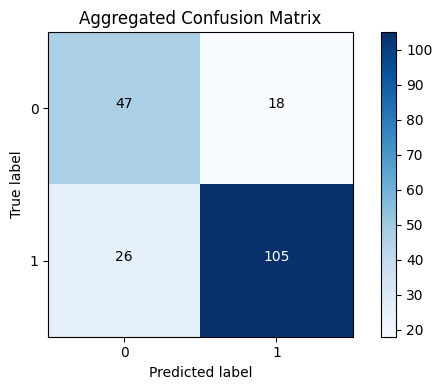


Final Results:
{'accuracy': 0.7755102040816326, 'f1_score': 0.7539655369165811, 'precision': 0.748747076511861, 'recall': 0.7623018203170875, 'roc_auc': 0.7586611861421022, 'confusion_matrix': array([[ 47,  18],
       [ 26, 105]])}


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# If you have a GPU, ensure that CUDA operations are deterministic (optional)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Custom PyTorch Dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Neural Network with Attention Block
class AttentionBlock(nn.Module):
    def __init__(self, input_dim):
        super(AttentionBlock, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=4, dropout=0.2)
        self.layer_norm = nn.LayerNorm(input_dim)

    def forward(self, x):
        x = x.unsqueeze(1)
        attn_output, _ = self.attention(x, x, x)
        x = self.layer_norm(attn_output + x)
        return x.squeeze(1)

class AdvancedResidualNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(AdvancedResidualNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.attention = AttentionBlock(hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.SiLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x1 = self.relu(self.bn1(self.fc1(x)))
        x1 = self.attention(x1)
        x2 = self.relu(self.bn2(self.fc2(x1)))
        x3 = self.fc3(x2)
        return x3

# Train and Evaluate Model
def train_and_evaluate_model(model, train_loader, test_loader, optimizer, criterion, scheduler, epochs):
    best_val_accuracy = 0.0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        for features_batch, labels_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(features_batch)
            loss = criterion(outputs, labels_batch)
            loss.backward()
            optimizer.step()
        scheduler.step(epoch)

        # Validate after each epoch
        model.eval()
        val_preds = []
        val_labels = []
        with torch.no_grad():
            for features_batch, labels_batch in test_loader:
                outputs = model(features_batch)
                _, predicted = torch.max(outputs, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_labels.extend(labels_batch.cpu().numpy())

        val_accuracy = accuracy_score(val_labels, val_preds)
        # Track the best model state
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    # Load the best model state before final evaluation
    model.load_state_dict(best_model_state)

    # Final evaluation with best model
    model.eval()
    val_preds = []
    val_labels = []
    val_probs = []
    with torch.no_grad():
        for features_batch, labels_batch in test_loader:
            outputs = model(features_batch)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels_batch.cpu().numpy())
            val_probs.extend(probs.cpu().numpy())

    return np.array(val_preds), np.array(val_labels), np.array(val_probs)

# Cross Validation and Metrics
def cross_validate(features, labels, input_dim, hidden_dim1, hidden_dim2, output_dim, epochs=200):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

    all_preds = []
    all_labels = []
    all_probs = []
    confusion_matrices = []

    for fold, (train_idx, test_idx) in enumerate(kfold.split(features, labels)):
        print(f"Fold {fold + 1}")

        X_train, X_test = features[train_idx], features[test_idx]
        y_train, y_test = labels[train_idx], labels[test_idx]

        train_dataset = CustomDataset(X_train, y_train)
        test_dataset = CustomDataset(X_test, y_test)
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

        model = AdvancedResidualNN(input_dim=input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2, output_dim=output_dim)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.AdamW(model.parameters(), lr=0.0003, weight_decay=1e-6)
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

        val_preds, val_labels, val_probs = train_and_evaluate_model(
            model, train_loader, test_loader, optimizer, criterion, scheduler, epochs
        )

        all_preds.extend(val_preds)
        all_labels.extend(val_labels)
        all_probs.extend(val_probs)

        cm = confusion_matrix(val_labels, val_preds)
        confusion_matrices.append(cm)

        fold_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Accuracy for Fold {fold + 1}: {fold_accuracy:.2f}")

    # Compute overall metrics
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    roc_auc = roc_auc_score(all_labels, all_probs[:, 1])

    aggregated_cm = np.sum(confusion_matrices, axis=0)

    print("\nFinal Metrics after 10-Fold:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Aggregated Confusion Matrix:")
    print(aggregated_cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(aggregated_cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Aggregated Confusion Matrix")
    plt.colorbar()
    classes = np.unique(all_labels)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = aggregated_cm.max() / 2.
    for i in range(aggregated_cm.shape[0]):
        for j in range(aggregated_cm.shape[1]):
            plt.text(j, i, format(aggregated_cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if aggregated_cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

    results = {
        "accuracy": accuracy,
        "f1_score": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
        "confusion_matrix": aggregated_cm
    }

    return results

# Main Execution
from sklearn.preprocessing import LabelEncoder, StandardScaler

if __name__ == "__main__":
    # Load your dataset here
    file_path = "/content/CV_data.csv"  # Replace with your dataset path
    data = pd.read_csv(file_path)

    # Drop rows with missing values
    data = data.dropna()

    # Assume the last column is the label and others are features
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values

    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    # Normalize features if needed
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Run cross-validation
    results = cross_validate(features, labels, input_dim=features.shape[1], hidden_dim1=512, hidden_dim2=256, output_dim=len(np.unique(labels)), epochs=100)

    print("\nFinal Results:")
    print(results)


# Stacking Model


Evaluating LightGBM with Neural Network...
Fold 1
[LightGBM] [Info] Number of positive: 117, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664773 -> initscore=0.684636
[LightGBM] [Info] Start training from score 0.684636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 1: 0.35
Fold 2
[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 2: 0.75
Fold 3
[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 3: 0.75
Fold 4
[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 4: 0.65
Fold 5
[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 5: 0.70
Fold 6
[LightGBM] [Info] Number of positive: 118, number of negative: 58
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.670455 -> initscore=0.710242
[LightGBM] [Info] Start training from score 0.710242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 6: 0.80
Fold 7
[LightGBM] [Info] Number of positive: 118, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 7: 0.74
Fold 8
[LightGBM] [Info] Number of positive: 118, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 8: 0.68
Fold 9
[LightGBM] [Info] Number of positive: 118, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 9: 0.74
Fold 10
[LightGBM] [Info] Number of positive: 118, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

<ipython-input-21-f06e17208ad0>:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_df['f3'].fillna(train_mean_f3, inplace=True)
<ipython-input-21-f06e17208ad0>:208: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy for Fold 10: 0.79

Final Metrics after 10-Fold:
Accuracy: 0.69
F1-score: 0.64
Precision: 0.65
Recall: 0.64
ROC AUC: 0.62
Aggregated Confusion Matrix:
[[ 30  35]
 [ 25 106]]


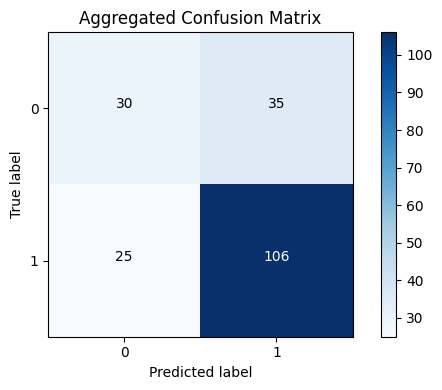


Overall Model Comparison:
LightGBM:
  Mean Accuracy = 0.69
  Mean F1-score = 0.64
  Mean Precision = 0.65
  Mean Recall = 0.64
  Mean ROC AUC = 0.62


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             precision_score, recall_score, roc_auc_score)
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)

# If you have a GPU, ensure that CUDA operations are deterministic (optional)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ---------------------------------------------------------------------
# Step 1: Load data (only label-encode; do NOT fillna or scale here)
# ---------------------------------------------------------------------
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    label_encoder = LabelEncoder()
    data['label'] = label_encoder.fit_transform(data['label'])
    # Just return the raw features (without scaling/imputation)
    # so that we can do fold-by-fold transformations
    features = data[['f1', 'f2', 'f3']].values
    return data, features, label_encoder

# ---------------------------------------------------------------------
# (Optional) If you still want a function that trains a model and
# transforms features, you could keep or remove. Shown here for completeness.
# ---------------------------------------------------------------------
def train_and_transform(features, labels, model, model_name):
    """
    Not used in the main flow below, but kept in case you need it
    for quick model training and feature transformation.
    """
    print(f"Training {model_name}...")
    model.fit(features, labels)

    # If the model supports predict_proba, use it for transformed features
    if hasattr(model, "predict_proba"):
        transformed_features = model.predict_proba(features)
    else:
        preds = model.predict(features)
        transformed_features = preds.reshape(-1, 1)

    if len(transformed_features.shape) == 1:
        transformed_features = transformed_features.reshape(-1, 1)

    print(f"Transformed features shape for {model_name}: {transformed_features.shape}")
    return transformed_features

# ---------------------------------------------------------------------
# Step 3: Custom PyTorch Dataset
# ---------------------------------------------------------------------
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# ---------------------------------------------------------------------
# Step 4: Neural Network with Attention Block
# ---------------------------------------------------------------------
class AttentionBlock(nn.Module):
    def __init__(self, input_dim):
        super(AttentionBlock, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=4, dropout=0.2)
        self.layer_norm = nn.LayerNorm(input_dim)

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        # We treat each sample as a sequence of length=1 with 'embed_dim' = input_dim
        x = x.unsqueeze(1)  # (batch_size, 1, input_dim)
        attn_output, _ = self.attention(x, x, x)  # MHA requires (seq_len, batch_size, embed_dim) if batch_first=False
        x = self.layer_norm(attn_output + x)
        return x.squeeze(1)  # (batch_size, input_dim)

class AdvancedResidualNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(AdvancedResidualNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.attention = AttentionBlock(hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.SiLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x1 = self.relu(self.bn1(self.fc1(x)))
        x1 = self.attention(x1)
        x2 = self.relu(self.bn2(self.fc2(x1)))
        x3 = self.fc3(x2)
        return x3

# ---------------------------------------------------------------------
# Step 5: Train and Evaluate Model (Second-level NN)
# ---------------------------------------------------------------------
def train_and_evaluate_model(model, train_loader, test_loader, optimizer, criterion, scheduler, epochs):
    best_val_accuracy = 0.0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        for features_batch, labels_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(features_batch)
            loss = criterion(outputs, labels_batch)
            loss.backward()
            optimizer.step()

        # Optionally step the scheduler
        scheduler.step(epoch)

        # Validate after each epoch
        model.eval()
        val_preds = []
        val_labels = []
        with torch.no_grad():
            for features_batch, labels_batch in test_loader:
                outputs = model(features_batch)
                _, predicted = torch.max(outputs, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_labels.extend(labels_batch.cpu().numpy())

        val_accuracy = accuracy_score(val_labels, val_preds)
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            # Save a copy of the model (on CPU) for best epoch
            best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    # Load best state
    model.load_state_dict(best_model_state)

    # Final evaluation with best model
    model.eval()
    val_preds = []
    val_labels = []
    val_probs = []
    with torch.no_grad():
        for features_batch, labels_batch in test_loader:
            outputs = model(features_batch)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels_batch.cpu().numpy())
            val_probs.extend(probs.cpu().numpy())

    return np.array(val_preds), np.array(val_labels), np.array(val_probs)

# ---------------------------------------------------------------------
# Step 6: Cross-Validation and Metrics (Stacking Approach)
# ---------------------------------------------------------------------
def cross_validate(
    data,
    features,        # not scaled/imputed yet; used for fold splitting
    label_column,
    model,
    model_name,
    input_dim,
    hidden_dim1,
    hidden_dim2,
    output_dim,
    epochs=200
):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

    # For convenience:
    y = data[label_column].values

    all_preds = []
    all_labels = []
    all_probs = []
    confusion_matrices = []

    # This will hold out-of-fold predictions (probabilities) from the base model
    # for each of the N samples. Shape: (N, output_dim).
    oof_preds = np.zeros((data.shape[0], output_dim))

    for fold, (train_idx, test_idx) in enumerate(kfold.split(features, y)):
        print(f"Fold {fold + 1}")

        # Split raw data by fold
        X_train_df = data.iloc[train_idx].copy()
        X_test_df  = data.iloc[test_idx].copy()
        y_train = y[train_idx]
        y_test  = y[test_idx]

        # 1) Impute missing values on the training fold only
        train_mean_f3 = X_train_df['f3'].mean()
        X_train_df['f3'].fillna(train_mean_f3, inplace=True)
        X_test_df['f3'].fillna(train_mean_f3, inplace=True)

        # 2) Scale using the training fold only
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_df[['f1', 'f2', 'f3']])
        X_test_scaled  = scaler.transform(X_test_df[['f1', 'f2', 'f3']])

        # 3) Train the base model (LightGBM)
        model.fit(X_train_scaled, y_train)

        # 4) Generate out-of-fold predictions on the validation fold
        oof_preds[test_idx] = model.predict_proba(X_test_scaled)

        # -----------------------------------------------------------
        # Second-level model (NN) training:
        # Use the OOF predictions from the training portion as features
        # and the same fold's y_train as labels.
        # -----------------------------------------------------------
        train_dataset = CustomDataset(oof_preds[train_idx], y_train)
        test_dataset  = CustomDataset(oof_preds[test_idx],  y_test)
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

        model_nn = AdvancedResidualNN(
            input_dim=output_dim,    # number of columns in oof_preds = number of classes
            hidden_dim1=hidden_dim1,
            hidden_dim2=hidden_dim2,
            output_dim=output_dim
        )

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.AdamW(model_nn.parameters(), lr=0.0003, weight_decay=1e-6)
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

        val_preds, val_labels, val_probs = train_and_evaluate_model(
            model_nn, train_loader, test_loader, optimizer, criterion, scheduler, epochs
        )

        # Collect predictions & labels for overall metrics
        all_preds.extend(val_preds)
        all_labels.extend(val_labels)
        all_probs.extend(val_probs)

        cm = confusion_matrix(val_labels, val_preds)
        confusion_matrices.append(cm)

        fold_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Accuracy for Fold {fold + 1}: {fold_accuracy:.2f}")

    # -----------------------------------------------------------
    # Compute overall metrics across all folds
    # -----------------------------------------------------------
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')

    # For binary classification, we use the second column for positive class
    # If you have multi-class, you'd need a different approach for ROC-AUC
    roc_auc = roc_auc_score(all_labels, all_probs[:, 1])

    aggregated_cm = np.sum(confusion_matrices, axis=0)

    print("\nFinal Metrics after 10-Fold:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Aggregated Confusion Matrix:")
    print(aggregated_cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(aggregated_cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Aggregated Confusion Matrix")
    plt.colorbar()
    classes = np.unique(all_labels)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = aggregated_cm.max() / 2.
    for i in range(aggregated_cm.shape[0]):
        for j in range(aggregated_cm.shape[1]):
            plt.text(j, i, format(aggregated_cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if aggregated_cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

    results = {
        "accuracy": accuracy,
        "f1_score": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
        "confusion_matrix": aggregated_cm
    }
    return results

# ---------------------------------------------------------------------
# Step 7: Compare Algorithms (Only LightGBM in this example)
# ---------------------------------------------------------------------
def compare_algorithms(file_path):
    data, features, label_encoder = load_and_preprocess_data(file_path)

    # Only LightGBM
    model = LGBMClassifier(random_state=SEED)

    print(f"\nEvaluating LightGBM with Neural Network...")
    results = cross_validate(
        data,
        features,
        label_column='label',
        model=model,
        model_name="LightGBM",
        input_dim=features.shape[1],  # raw features dimension (3)
        hidden_dim1=512,
        hidden_dim2=256,
        output_dim=2,    # For binary classification
        epochs=200
    )

    return results

# ---------------------------------------------------------------------
# Main Execution
# ---------------------------------------------------------------------
if __name__ == "__main__":
    file_path = "/content/CV_data.csv"  # Specify your file path
    results = compare_algorithms(file_path)

    print("\nOverall Model Comparison:")
    print(f"LightGBM:")
    print(f"  Mean Accuracy = {results['accuracy']:.2f}")
    print(f"  Mean F1-score = {results['f1_score']:.2f}")
    print(f"  Mean Precision = {results['precision']:.2f}")
    print(f"  Mean Recall = {results['recall']:.2f}")
    print(f"  Mean ROC AUC = {results['roc_auc']:.2f}")
